In [58]:
import pandas as pd
import os
import numpy as np
import re
import datetime
import csv
import bash
import PIL
import json
import nltk
import pytesseract
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from nltk.stem.porter import PorterStemmer
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import os
stop = stopwords.words('english')
PIL.Image.MAX_IMAGE_PIXELS = 1003445512
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

In [59]:
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

In [60]:
df1851_1980 = pd.read_csv(r"NYT_text_1851_1980.csv")

In [61]:
df2 = df1851_1980

In [146]:
def words_clean_cloud_df_beta(df, column_name, stem = False):
    def get_df_name(df):
        name =[x for x in globals() if globals()[x] is df][0]
        return name
    comment_words = ' '
    counts_all = Counter()
    stopwords = set(stop) 
    stopwords |= {"New", "York", "Times", "copyright", "said", "would", "one" ,"two", "year", "mr", "added", "including", "years",
                      "monday", "see", "make", "three", "since", "say", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday",
                     "made", "want", "many", "without", "need", "get", "way", "through", "whether", "next", "used", "saying", "going",
                     "even", "month", "week", "president", "trump", "led", "also", "Trump", "go", "man", "men", "still", "told", "may",
                  "back", "like", "news", "people", "take", "never", "often", "every", "though", "later", "recent", "use", "could", "much",
                 "last", "around", "put", "away", "began", "left", "four", "five", "six", "seven", "eight", "nine", "ten", "good", "months",
                 "accross", "others", "first", "second", "third", "ms", "already", "long", "known", "wrote", "among", "asked", "accross",
                 "according", "might", "high", "Obama", "obama", "Obama", "yesterday", "today", "tomorrow", "american", "government", "state",
                 "along", "must", "went", "little", "nan", "published", "oe", "te", "mrs",
                 "e", "ay", "te", "ta", "et", "ad", "however", "other", "another", "en", "os",
                 "ar", "shall", "less", "more", "great", "well", "large", "old", "yet", "nothing",
                 "work", "upon", "several", "whose", "matter", "es", "ever", "almost",
                 "know", "ye", "ago", "cannot", "thing", "cause", "no", "yes", "er", "we're", "i'm", "bush", "permission", "proquest",
                 "span", "index", "newspapers", "1923", "current", "reproduction", "reproduced", "1923current", "newyork", "prohibited"}
    porter = PorterStemmer()
    wdcloud = WordCloud(width = 1600, height = 900, background_color ='white', 
                        stopwords = stopwords, max_font_size=150, min_font_size=15)
    # iterate through the csv file 
    if stem is True:
        for val in df[column_name].str.lower(): 
            tokens = val.split() 
            stemmed = [porter.stem(word) for word in tokens]
            for words in stemmed: 
                comment_words = comment_words + words + ' '
        counts_line = wdcloud.process_text(comment_words)
        counts_all.update(counts_line)
                
    else:
        for val in df[column_name].str.lower(): 
            counts_line = wdcloud.process_text(str(val))
            counts_all.update(counts_line)

    wdcloud.generate_from_frequencies(counts_all)


    plt.figure(figsize = (16, 8), facecolor = None) 
    plt.imshow(wdcloud, interpolation='bilinear')
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.savefig(get_df_name(df)+".png")
    plt.show() 
    
    keys = []
    values = []
    for i, j in counts_all.items():
        keys.append(i)
        values.append(j)
    counts = pd.DataFrame(values, index = keys, columns =['counts'])
    
    return counts.sort_values(by = "counts", ascending = False)

In [147]:
df_1851_1869 = df2[ (1851 <= df2.year) & (df2.year <= 1869) ]

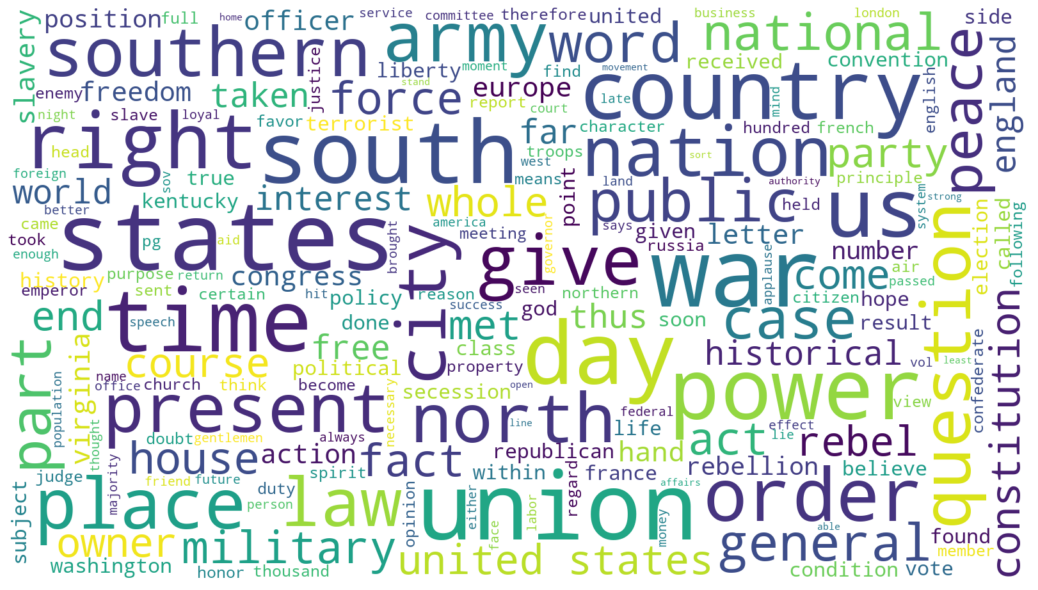

counts
war            729
states         724
union          698
time           607
south          607
...            ...
virginigis       1
hiicugh          1
upelare          1
ragw             1
glowed           1

[28547 rows x 1 columns]

In [148]:
# 1851-1869 New York Times Terrorism News Words Cloud and Counts 
words_clean_cloud_df_beta(df_1851_1869, "text", stem = False)

In [149]:
df_1870_1889 = df2[ (1870 <= df2.year) & (df2.year <= 1889) ]

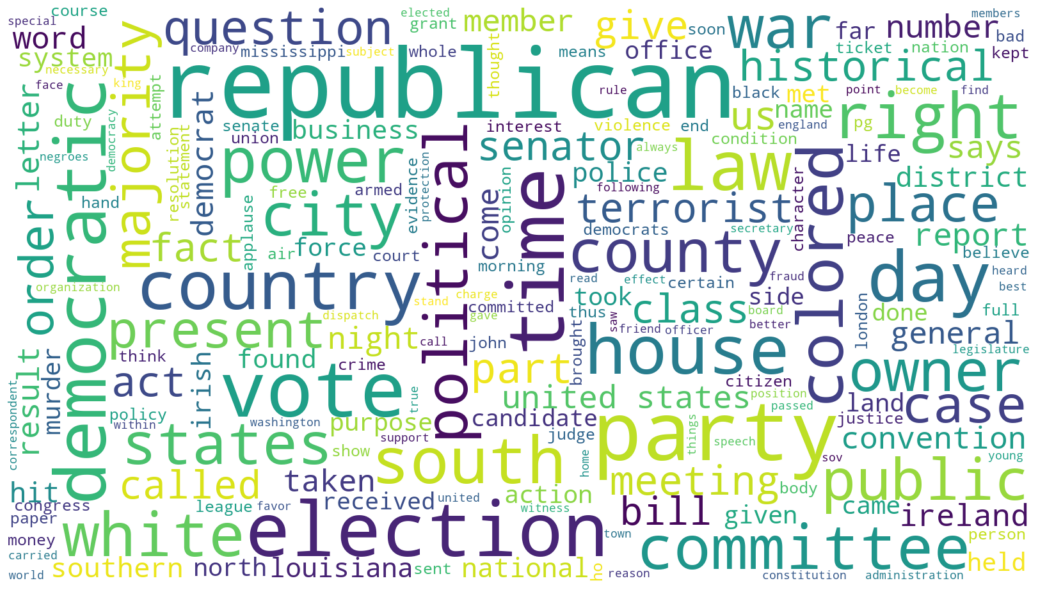

counts
republican     1467
party          1027
time            942
vote            929
election        865
...             ...
inapooctod        1
hkittory          1
ropregeuted       1
twontyone         1
renowned          1

[30383 rows x 1 columns]

In [150]:
# 1870-1889 New York Times Terrorism News Words Cloud and Counts 
words_clean_cloud_df_beta(df_1870_1889, "text", stem = False)

In [151]:
df_1890_1909 = df2[ (1890 <= df2.year) & (df2.year <= 1909) ]

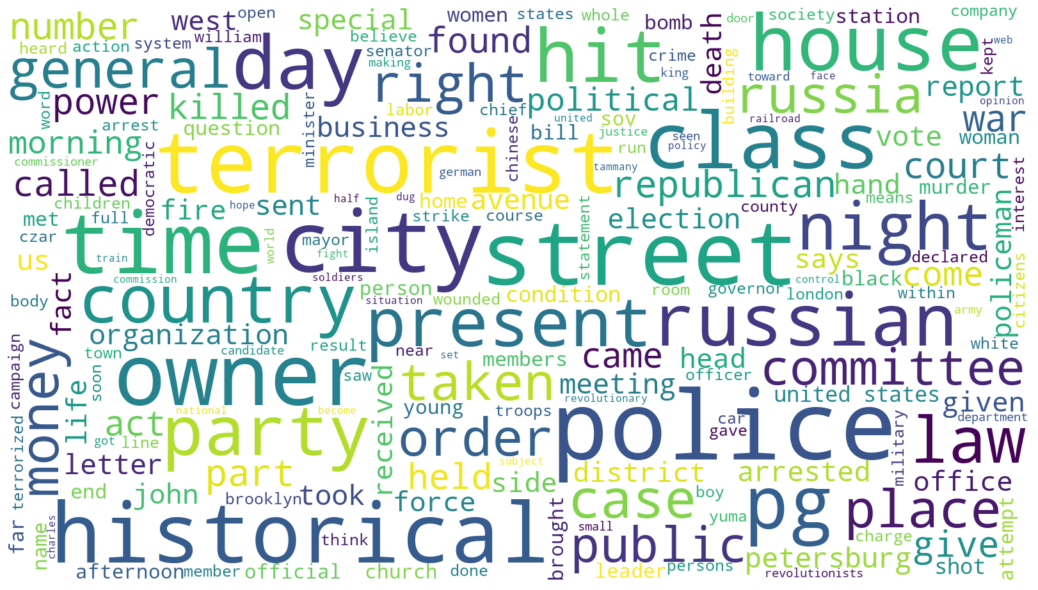

counts
police          741
street          629
terrorist       592
owner           588
city            583
...             ...
nucleus           1
nonexistent       1
organic           1
talkers           1
perry             1

[22248 rows x 1 columns]

In [152]:
# 1890-1909 New York Times Terrorism News Words Cloud and Counts 
words_clean_cloud_df_beta(df_1890_1909, "text", stem = False)

In [153]:
df_1910_1929 = df2[ (1910 <= df2.year) & (df2.year <= 1929) ]

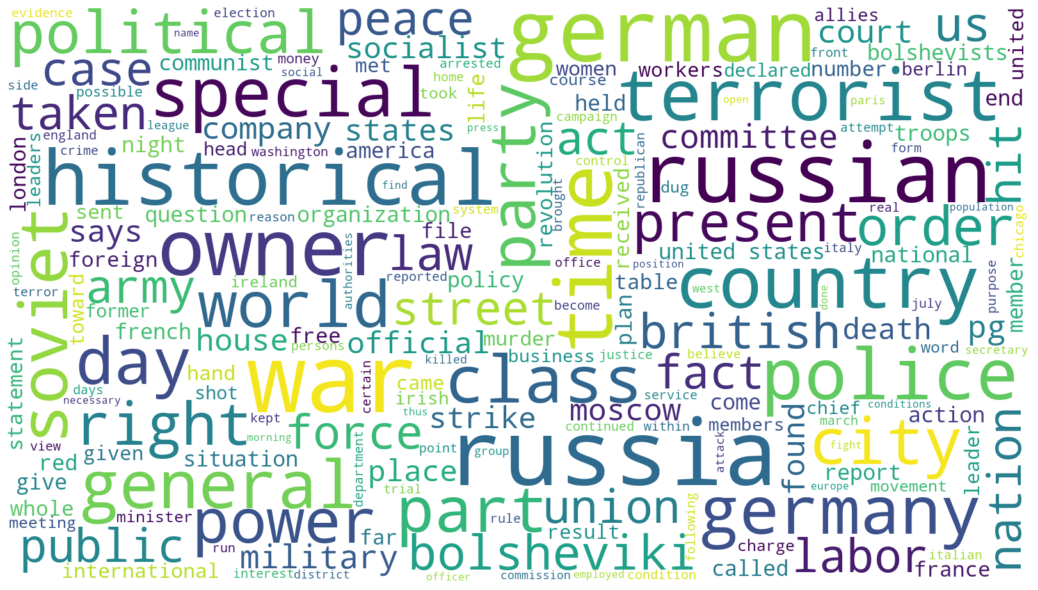

counts
war                2727
russia             2461
german             2201
russian            2027
time               1847
...                 ...
blacksmith            1
roseoles              1
debreczen             1
kaschauoderberg       1
mayoraity             1

[40533 rows x 1 columns]

In [154]:
# 1910-1929 New York Times Terrorism News Words Cloud and Counts 
words_clean_cloud_df_beta(df_1910_1929, "text", stem = False)

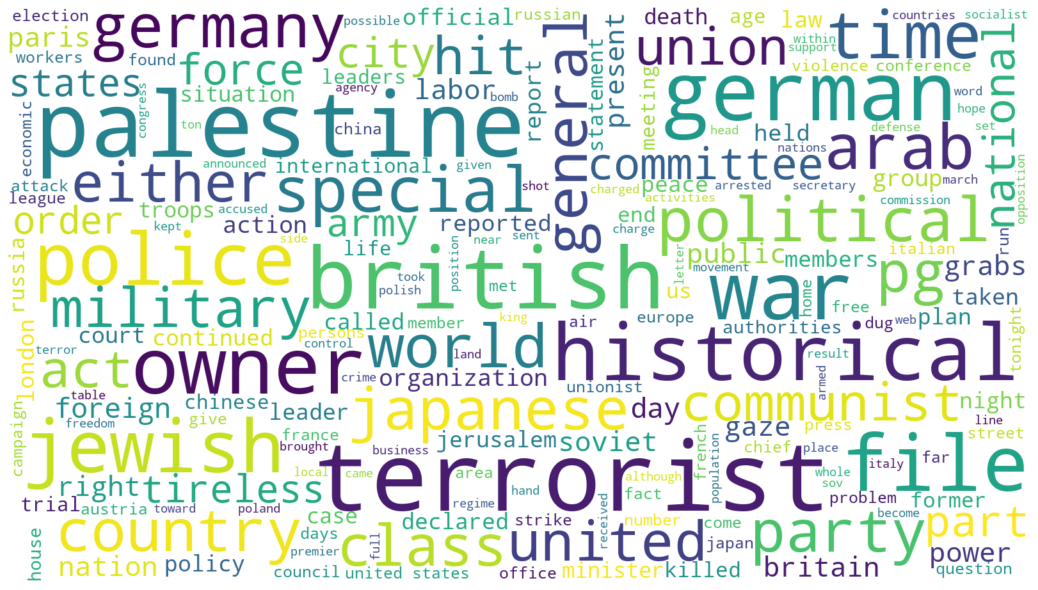

counts
terrorist     5765
palestine     5120
british       4455
german        4140
war           4000
...            ...
pégnied          1
agents4hal       1
nessn            1
bhieh            1
admit'           1

[50914 rows x 1 columns]

In [155]:
# 1930-1949 New York Times Terrorism News Words Cloud and Counts 
df_1930_1949 = df2[ (1930 <= df2.year) & (df2.year <= 1949) ]
words_clean_cloud_df_beta(df_1930_1949, "text", stem = False)

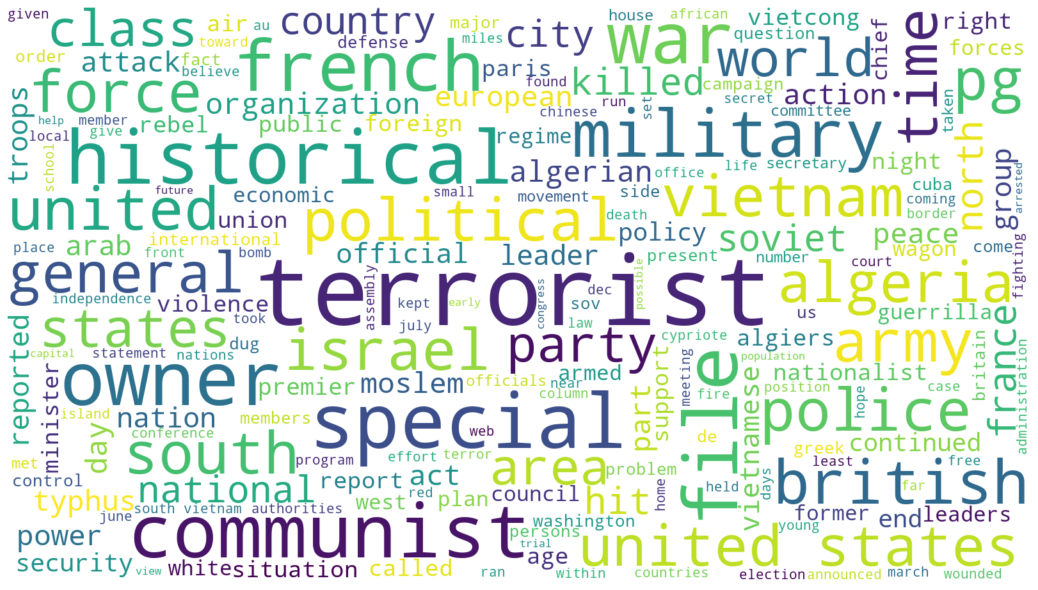

counts
terrorist      8793
special        5160
owner          4984
file           4868
historical     4837
...             ...
dashiell          1
sandhurst         1
negligently       1
fancyfree         1
50s               1

[55607 rows x 1 columns]

In [156]:
# 1950-1969 New York Times Terrorism News Words Cloud and Counts 
df_1950_1969 = df2[ (1950 <= df2.year) & (df2.year <= 1969) ]
words_clean_cloud_df_beta(df_1950_1969, "text", stem = False)

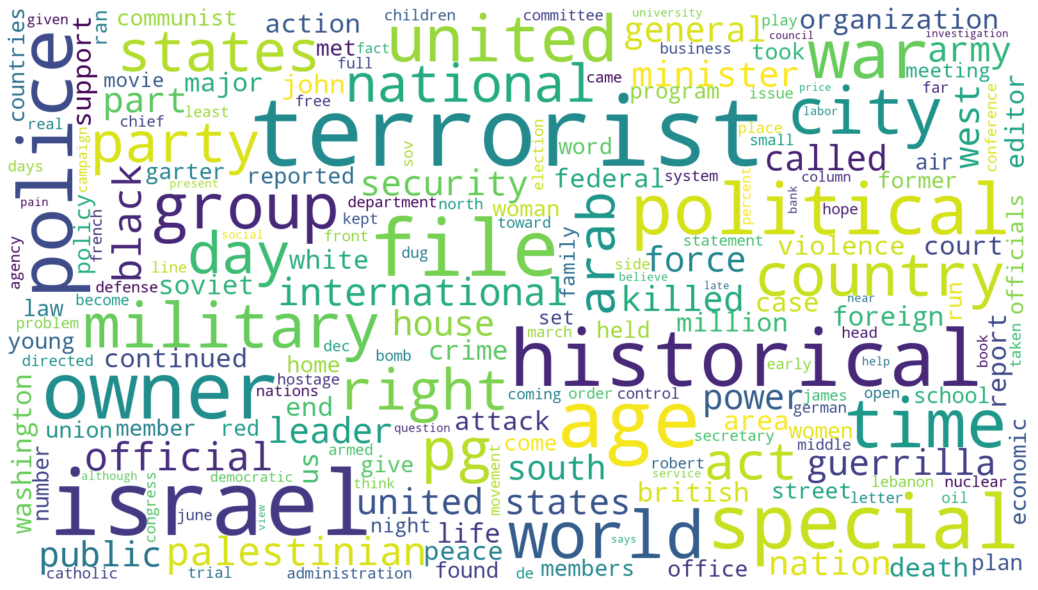

counts
terrorist         17626
israel            15616
age               12032
owner             11945
file              11654
...                 ...
chaffing              1
lerzundicharles       1
horinegeorge          1
lyonsrev              1
liuthomas             1

[125642 rows x 1 columns]

In [157]:
# 1970-1980 New York Times Terrorism News Words Cloud and Counts 
df_1970_1980 = df2[ (1970 <= df2.year) & (df2.year <= 1980) ]
words_clean_cloud_df_beta(df_1970_1980, "text", stem = False)